In [2]:
import numpy as np
import pandas as pd
import re

from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
seaborn.set(style='ticks')

In [3]:
fermi = pd.read_csv('galactic_fermi_trg.csv', index_col=False)

In [4]:
fermi_clean = fermi.rename(columns=lambda x: x.strip())
fermi_clean = fermi_clean.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
fermi_clean = fermi_clean.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
fermi = fermi_clean

In [5]:
fermi.head()

,trigger_name,name,lii,bii,trigger_type
0,bn120403857,grb120403857,302.1752,-27.8569,grb
1,bn140912846,tgf140912846,302.3060,-28.0394,tgf
2,bn120227725,grb120227725,304.0768,-26.6216,grb
3,bn140630748,tgf140630748,301.3748,-26.4425,tgf
4,bn141205018,grb141205018,305.6055,-27.5957,grb


In [6]:
li = fermi['lii'].tolist()
bi = fermi['bii'].tolist()

In [7]:
len(li)

6484

In [8]:
c = SkyCoord(li, bi, frame='galactic', unit='deg')

In [9]:
c

<SkyCoord (Galactic): (l, b) in deg
    [( 302.1752, -27.8569), ( 302.306 , -28.0394), ( 304.0768, -26.6216),
     ..., ( 122.0478,  28.3266), ( 124.2291,  27.9166),
     ( 121.8252,  27.5836)]>

In [10]:
c.representation_type = 'cartesian'

In [11]:
c

<SkyCoord (Galactic): (u, v, w) [dimensionless]
    [( 0.47080131, -0.74833793, -0.46726488),
     ( 0.47171062, -0.74599945, -0.47007862),
     ( 0.50090327, -0.74047671, -0.44809614), ...,
     (-0.46708784,  0.74611099,  0.47449693),
     (-0.49704487,  0.73058088,  0.46818584),
     (-0.46739124,  0.75308512,  0.46304235)]>

In [12]:
x = []
y = []
z = []

for i in c:
    x.append(float(i.u))
    y.append(float(i.v))
    z.append(float(i.w))

In [13]:
len(x)

6484

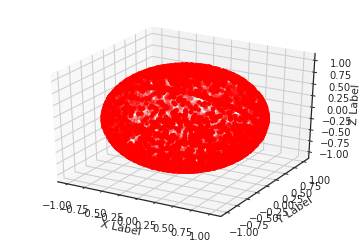

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [15]:
fermi['u'] = c.u
fermi['v'] = c.v
fermi['w'] = c.w
fermi = fermi.drop(['lii', 'bii'], axis=1)

In [16]:
fermi.head() 

,trigger_name,name,trigger_type,u,v,w
0,bn120403857,grb120403857,grb,0.470801,-0.748338,-0.467265
1,bn140912846,tgf140912846,tgf,0.471711,-0.745999,-0.470079
2,bn120227725,grb120227725,grb,0.500903,-0.740477,-0.448096
3,bn140630748,tgf140630748,tgf,0.466166,-0.764459,-0.445299
4,bn141205018,grb141205018,grb,0.515969,-0.720552,-0.463230


In [17]:
#create unique list of names
d_types = fermi.trigger_type.unique()

#create a data frame dictionary to store your data frames
fermi_dict = {elem : pd.DataFrame for elem in d_types}

for key in fermi_dict.keys():
    fermi_dict[key] = fermi[:][fermi.trigger_type == key]

In [18]:
fermi_dict.keys()

dict_keys(['grb', 'tgf', 'loclpar', 'uncert', 'distpar', 'sgr', 'transnt', 'sflare', 'unreloc', 'sfl', 'galbin'])

In [19]:
len(fermi_dict['grb']['u'].tolist())

2403

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl

init_notebook_mode(connected=True)

traces = []

for k in fermi_dict.keys():
    a = go.Scatter3d(
        x=fermi_dict[k]['u'].tolist(),
        y=fermi_dict[k]['v'].tolist(),
        z=fermi_dict[k]['w'].tolist(),
        name=k,
        mode='markers',
        marker=dict(
            size=2,
            line=dict(
                #color='red',
                colorscale='Viridis',
                width=0.9
            ),
            opacity=0.8
        )
    )
    
    traces.append(a)
  

data = traces
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='GRB coordinates')

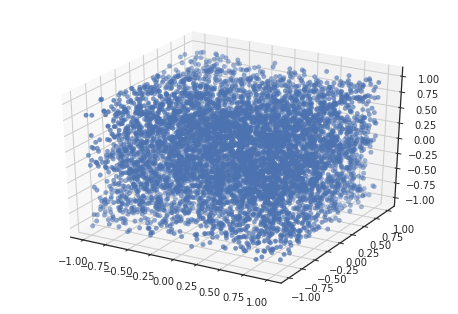

In [21]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = x
sequence_containing_y_vals = y
sequence_containing_z_vals = z

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

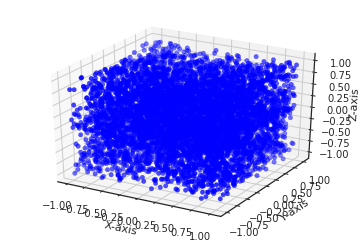

In [22]:
   fig = plt.figure()
   ax = fig.add_subplot(111, projection='3d')

   # Generate the values
   x_vals = x
   y_vals = y
   z_vals = z

   # Plot the values
   ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
   ax.set_xlabel('X-axis')
   ax.set_ylabel('Y-axis')
   ax.set_zlabel('Z-axis')

   plt.show()

#### Cluster grbs based on location:

In [52]:
import sklearn.cluster

mat = fermi_dict['grb'][['u', 'v', 'w']].as_matrix()
km = sklearn.cluster.KMeans(n_clusters=10)
km.fit(mat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
km.labels_

array([2, 2, 2, ..., 6, 6, 6], dtype=int32)

In [54]:
km.cluster_centers_

array([[ 0.89770531, -0.11880116,  0.09560981],
       [-0.88376761,  0.04209273, -0.19399505],
       [ 0.38168052, -0.70562426, -0.39723737],
       [ 0.31862564,  0.59558487,  0.59801412],
       [-0.15418987,  0.03756475, -0.88618953],
       [-0.31422794,  0.82545293, -0.16776842],
       [-0.54009993,  0.16784468,  0.70175478],
       [-0.4968235 , -0.7447039 ,  0.09154081],
       [ 0.5919802 ,  0.44250334, -0.51591152],
       [ 0.29385021, -0.43130747,  0.73326603]])

In [55]:
x_g = km.cluster_centers_[0].tolist()
y_g = km.cluster_centers_[1].tolist()
z_g = km.cluster_centers_[2].tolist()



In [56]:
type(km.cluster_centers_.tolist())

list

In [57]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl

init_notebook_mode(connected=True)

grb = go.Scatter3d(
        x=x_g,
        y=y_g,
        z=z_g,
        name='grb',
        mode='markers',
        marker=dict(
            size=2,
            line=dict(
                #color='red',
                colorscale='Viridis',
                width=0.9
            ),
            opacity=0.8
        )
    )
  

data = [grb]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='GRB coordinates')

#### Affinity Propagation

In [58]:
ap = sklearn.cluster.AffinityPropagation()

In [59]:
ap.fit(mat)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [60]:
ap.cluster_centers_

array([[  6.43217958e-01,  -6.91654610e-01,  -3.28457851e-01],
       [  2.82419512e-01,  -7.34608749e-01,  -6.16919124e-01],
       [  3.28389790e-01,  -9.40986520e-01,  -8.18811063e-02],
       [  6.41686374e-01,  -7.66950372e-01,   5.07190506e-03],
       [  5.55384526e-01,  -3.59121137e-01,  -7.50053356e-01],
       [  7.53819718e-01,  -6.56216925e-01,  -3.36924394e-02],
       [ -2.07480470e-02,  -6.79166718e-01,  -7.33690730e-01],
       [  8.98730768e-01,  -3.31304473e-01,  -2.87263559e-01],
       [ -5.18084938e-02,  -9.65415523e-01,  -2.55516629e-01],
       [  5.71602839e-01,  -8.01768990e-01,   1.74461117e-01],
       [  8.12371112e-01,  -5.73668040e-01,   1.04681210e-01],
       [  6.40187372e-01,  -7.23386464e-01,   2.58596505e-01],
       [  8.03419007e-01,  -8.14199102e-02,  -5.89820903e-01],
       [  7.25747186e-01,  -6.39947032e-01,   2.52505087e-01],
       [  2.38931576e-02,  -2.22164633e-01,  -9.74716365e-01],
       [  1.51623275e-01,  -9.30889177e-01,   3.3234879

In [61]:
ap.affinity_matrix_

array([[ -0.00000000e+00,  -1.33536750e-03,  -2.82847599e-03, ...,
         -3.99724228e+00,  -3.99992895e+00,  -3.99899511e+00],
       [ -1.33536750e-03,  -0.00000000e+00,  -8.53003604e-04, ...,
         -3.99822436e+00,  -3.99812777e+00,  -3.99948359e+00],
       [ -2.82847599e-03,  -8.53003604e-04,  -0.00000000e+00, ...,
         -3.99961930e+00,  -3.99683041e+00,  -3.99951673e+00],
       ..., 
       [ -3.99724228e+00,  -3.99822436e+00,  -3.99961930e+00, ...,
         -0.00000000e+00,  -2.77115594e-03,  -5.43662502e-04],
       [ -3.99992895e+00,  -3.99812777e+00,  -3.99683041e+00, ...,
         -2.77115594e-03,  -0.00000000e+00,  -1.17843745e-03],
       [ -3.99899511e+00,  -3.99948359e+00,  -3.99951673e+00, ...,
         -5.43662502e-04,  -1.17843745e-03,  -0.00000000e+00]])

In [62]:
ap.n_iter_

200

In [68]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))

Estimated number of clusters: 216
Silhouette Coefficient for AffinityPropagation: 0.361
Silhouette Coefficient for K-Means: 0.476


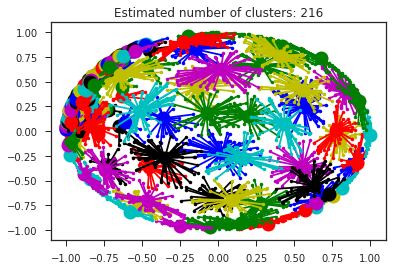

In [66]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = mat[cluster_centers_indices[k]]
    plt.plot(mat[class_members, 0], mat[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in mat[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### MeanShift

In [70]:
ms = sklearn.cluster.MeanShift()
ms.fit(mat)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [71]:
ms.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
ms.cluster_centers_

array([[ 0.30601381,  0.41168982, -0.00079834]])

In [73]:
x_m = ms.cluster_centers_[0].tolist()
y_m = ms.cluster_centers_[1].tolist()
z_m = ms.cluster_centers_[2].tolist()

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl

init_notebook_mode(connected=True)

grb_ms = go.Scatter3d(
        x=x_m,
        y=y_m,
        z=z_m,
        name='grb',
        mode='markers',
        marker=dict(
            size=2,
            line=dict(
                #color='red',
                colorscale='Viridis',
                width=0.9
            ),
            opacity=0.8
        )
    )
  

data = [grb_ms]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='GRB coordinates')

#### Spectral Clustering:

In [80]:
sc = sklearn.cluster.SpectralClustering(n_clusters=100, affinity='nearest_neighbors', n_neighbors=100, n_jobs=-1, eigen_solver='arpack')
sc.fit(mat)
sc.labels_

array([71, 71, 71, ..., 69, 69, 69], dtype=int32)

In [81]:
sc.affinity_matrix_

<2403x2403 sparse matrix of type '<class 'numpy.float64'>'
	with 250681 stored elements in Compressed Sparse Row format>

#### Hierarchical

In [106]:
ac = sklearn.cluster.AgglomerativeClustering(linkage='complete', n_clusters=20, affinity='manhattan')
ac.fit(mat)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=20, pooling_func=<function mean at 0x7f9fc81d5c80>)

#### DBSCAN

In [177]:
mat = fermi_dict['grb'][['u', 'v']].as_matrix()
mat = mat[:1000]

In [178]:
mat = StandardScaler().fit_transform(mat)

In [179]:
mat

array([[ 0.35106685, -0.78596136],
       [ 0.41280127, -0.76680534],
       [ 0.44369845, -0.71825222],
       ..., 
       [-0.91269459,  1.68021788],
       [ 1.3037028 ,  1.53968814],
       [ 1.30768953,  1.86839908]])

In [184]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Compute DBSCAN
db = DBSCAN(min_samples=50).fit(mat)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [151]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [157]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ..., 
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

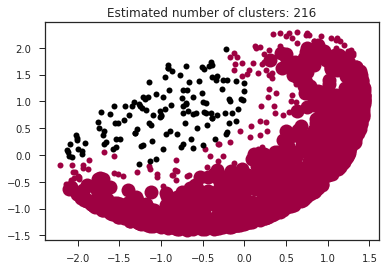

In [185]:


# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = mat[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = mat[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### Gaussian

/home/payal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1518: UserWarning:

Log scale: values of z <= 0 have been masked



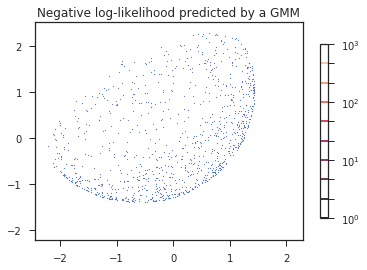

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture


# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(mat)

CS = plt.contour(mat, mat, mat, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(mat[:, 0], mat[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

#### Birch

In [253]:
mat = fermi_dict['grb'][['u', 'v', 'w']].as_matrix()

In [256]:
bi = sklearn.cluster.Birch(n_clusters = 9)

In [257]:
bi.fit(mat)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=9,
   threshold=0.5)

In [258]:
bi.labels_

array([5, 5, 5, ..., 0, 0, 0])

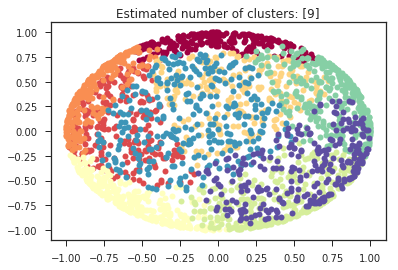

In [259]:

core_samples_mask = np.zeros_like(bi.labels_, dtype=bool)
#core_samples_mask[bi.core_sample_indices_] = True

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(bi.labels_)
labels = bi.labels_
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = mat[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = mat[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %s' % [len(set(bi.labels_)) - (1 if -1 in bi.labels_ else 0)])
plt.show()

### Cluster Quality

In [69]:
print("Silhouette Coefficient for AffinityPropagation: %0.3f"
      % metrics.silhouette_score(mat, ap.labels_, metric='sqeuclidean'))
print("Silhouette Coefficient for K-Means: %0.3f"
      % metrics.silhouette_score(mat, km.labels_, metric='sqeuclidean'))

Silhouette Coefficient for AffinityPropagation: 0.361
Silhouette Coefficient for K-Means: 0.476


In [82]:
print("Silhouette Coefficient for Spectral: %0.3f"
      % metrics.silhouette_score(mat, sc.labels_, metric='sqeuclidean'))

Silhouette Coefficient for Spectral: 0.372


In [107]:
print("Silhouette Coefficient for Aggromerative: %0.3f"
      % metrics.silhouette_score(mat, ac.labels_, metric='sqeuclidean'))

Silhouette Coefficient for Aggromerative: 0.354


In [189]:
print("Silhouette Coefficient for DBSCAN: %0.3f"
      % metrics.silhouette_score(mat, db.labels_, metric='sqeuclidean'))
[len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)] 

Silhouette Coefficient for DBSCAN: 0.203


[1]

In [245]:
print("Silhouette Coefficient for Birch: %0.3f"
      % metrics.silhouette_score(mat, bi.labels_, metric='sqeuclidean'))
[len(set(bi.labels_)) - (1 if -1 in bi.labels_ else 0)] 

Silhouette Coefficient for Birch: 0.514


[5]

**TODO:** Look deeper into Birch - best results!

#### Calinski-Harabaz Index (Alternative to Silhouette)

In [260]:
metrics.calinski_harabaz_score(mat, bi.labels_)

1105.7530049448221

In [261]:
metrics.calinski_harabaz_score(mat, ac.labels_)

966.47303229601005

In [262]:
metrics.calinski_harabaz_score(mat, km.labels_)

1150.7518722716222